In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from pulp import *
import seaborn as sn

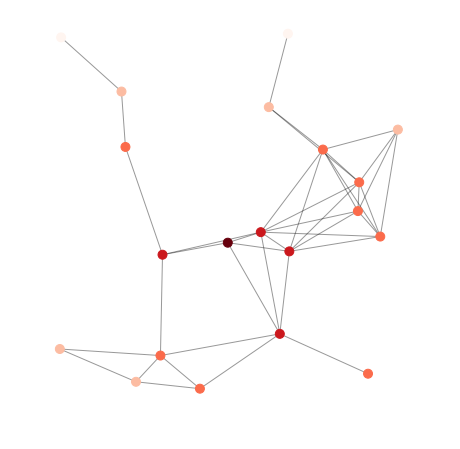

In [46]:
G = nx.random_geometric_graph(20, 0.3)
pos = nx.get_node_attributes(G, "pos")
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d
p = dict(nx.single_source_shortest_path_length(G, ncenter))
plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()

In [47]:
ll = list()
for i in pos:
    ll.append(pos[i][0])
rr = list()
for i in pos:
    rr.append(pos[i][1])
    

In [48]:
ll[0]

0.8142438090248736

In [49]:
rr[0]

0.533572685234795

In [50]:
pos[0]

[0.8142438090248736, 0.533572685234795]

In [51]:
df = pd.DataFrame()
df['Left'] = ll
df['Right'] = rr

In [52]:
df

,Left,Right
0,0.814244,0.533573
1,0.231616,0.835939
2,0.817458,0.606447
3,0.424894,0.084358
4,0.641749,0.982184
5,0.621779,0.223062
6,0.727979,0.689208
7,0.594634,0.796514
8,0.327611,0.168171
9,0.645223,0.431701


In [53]:
df['coordinate'] = list(zip(df['Left'],df['Right']))
df['ID'] = df.index

In [54]:
df

,Left,Right,coordinate,ID
0,0.814244,0.533573,"(0.8142438090248736, 0.533572685234795)",0
1,0.231616,0.835939,"(0.23161611584167707, 0.8359392289356969)",1
2,0.817458,0.606447,"(0.8174578279552104, 0.60644726258153)",2
3,0.424894,0.084358,"(0.4248943371416324, 0.08435815749254438)",3
4,0.641749,0.982184,"(0.641748612692819, 0.9821843826124353)",4
5,0.621779,0.223062,"(0.6217793275055747, 0.2230619095558518)",5
6,0.727979,0.689208,"(0.7279785180037043, 0.6892084845068177)",6
7,0.594634,0.796514,"(0.5946337138736884, 0.796514003613628)",7
8,0.327611,0.168171,"(0.32761079730393916, 0.16817116463857584)",8
9,0.645223,0.431701,"(0.6452233411761454, 0.43170079132085126)",9


In [55]:
import haversine as hs
from haversine import Unit

In [56]:
def dist_from(loc1,loc2): 
    dist=hs.haversine(loc1,loc2)
    return round(dist,2)

In [57]:
# parse location one by one to dist_from
for _,row in df.iterrows():
    df[row.ID]=df['coordinate'].apply(lambda x: dist_from(row.coordinate,x))

In [58]:
df.head()

,Left,Right,coordinate,ID,0,1,2,3,4,5,...,10,11,12,13,14,15,16,17,18,19
0,0.814244,0.533573,"(0.8142438090248736, 0.533572685234795)",0,0.00,72.99,8.11,66.10,53.44,40.62,...,77.47,94.87,45.82,90.42,66.21,36.75,54.93,27.27,9.43,25.40
1,0.231616,0.835939,"(0.23161611584167707, 0.8359392289356969)",1,72.99,0.00,69.96,86.29,48.42,80.78,...,81.73,22.49,104.22,74.36,15.62,51.53,47.25,54.96,81.80,76.48
2,0.817458,0.606447,"(0.8174578279552104, 0.60644726258153)",2,8.11,69.96,0.00,72.63,46.12,47.86,...,83.00,91.28,53.89,94.49,64.82,39.83,57.62,30.40,16.32,18.21
3,0.424894,0.084358,"(0.4248943371416324, 0.08435815749254438)",3,66.10,86.29,72.63,0.00,102.70,26.78,...,17.62,105.87,46.25,39.97,70.99,41.76,39.05,47.08,65.36,90.84
4,0.641749,0.982184,"(0.641748612692819, 0.9821843826124353)",4,53.44,48.42,46.12,102.70,0.00,84.43,...,106.37,62.15,98.10,108.48,54.74,61.04,71.02,56.30,62.40,40.43


In [59]:
distances_df=df.iloc[:,4:4183]
#distances_df.index=df.ID
distances_df.insert(0, 'ID', df.ID)

distances_df

,ID,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0,0.00,72.99,8.11,66.10,53.44,40.62,19.79,38.09,67.67,...,77.47,94.87,45.82,90.42,66.21,36.75,54.93,27.27,9.43,25.40
1,1,72.99,0.00,69.96,86.29,48.42,80.78,57.55,40.60,75.01,...,81.73,22.49,104.22,74.36,15.62,51.53,47.25,54.96,81.80,76.48
2,2,8.11,69.96,0.00,72.63,46.12,47.86,13.55,32.57,73.09,...,83.00,91.28,53.89,94.49,64.82,39.83,57.62,30.40,16.32,18.21
3,3,66.10,86.29,72.63,0.00,102.70,26.78,75.22,81.40,14.28,...,17.62,105.87,46.25,39.97,70.99,41.76,39.05,47.08,65.36,90.84
4,4,53.44,48.42,46.12,102.70,0.00,84.43,33.96,21.30,97.02,...,106.37,62.15,98.10,108.48,54.74,61.04,71.02,56.30,62.40,40.43
5,5,40.62,80.78,47.86,26.78,84.43,0.00,53.16,63.83,33.27,...,41.65,102.68,26.64,60.42,67.47,29.33,39.10,29.07,38.81,65.92
6,6,19.79,57.55,13.55,75.22,33.96,53.16,0.00,19.03,73.06,...,83.00,78.36,64.24,91.34,54.11,36.96,52.98,28.80,29.08,21.29
7,7,38.09,40.60,32.57,81.40,21.30,63.83,19.03,0.00,75.91,...,85.39,60.19,79.75,88.91,40.85,39.75,50.71,35.23,47.52,35.92
8,8,67.67,75.01,73.09,14.28,97.02,33.27,73.06,75.91,0.00,...,9.97,93.53,57.11,27.62,59.45,36.71,28.37,44.28,68.91,90.94
9,9,21.94,64.31,27.28,45.74,61.21,23.34,30.07,40.95,45.89,...,55.77,86.79,40.61,68.61,53.66,17.04,34.76,9.51,25.26,45.36


In [60]:
dist_dict={}

In [61]:
#positions to be plotted
locations = dict( ( ID, (df.loc[ID, 'Left'], df.loc[ID, 'Right']) ) for ID in df.index)
locations

{0: (0.8142438090248736, 0.533572685234795),
 1: (0.23161611584167707, 0.8359392289356969),
 2: (0.8174578279552104, 0.60644726258153),
 3: (0.4248943371416324, 0.08435815749254438),
 4: (0.641748612692819, 0.9821843826124353),
 5: (0.6217793275055747, 0.2230619095558518),
 6: (0.7279785180037043, 0.6892084845068177),
 7: (0.5946337138736884, 0.796514003613628),
 8: (0.32761079730393916, 0.16817116463857584),
 9: (0.6452233411761454, 0.43170079132085126),
 10: (0.2673995650827058, 0.10178907024536554),
 11: (0.08287693183570666, 0.9729357450131103),
 12: (0.8391291484129246, 0.12221650241922033),
 13: (0.07973493251291319, 0.1847212751541616),
 14: (0.24137606708227322, 0.6958095934881708),
 15: (0.4935377267943918, 0.4536068091280442),
 16: (0.33271520904099805, 0.4232212185516113),
 17: (0.5748916340799249, 0.4802869862839425),
 18: (0.8693276509047491, 0.4691356243684194),
 19: (0.9126767859922134, 0.7397041082948901)}

In [62]:
distances_df

,ID,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0,0.00,72.99,8.11,66.10,53.44,40.62,19.79,38.09,67.67,...,77.47,94.87,45.82,90.42,66.21,36.75,54.93,27.27,9.43,25.40
1,1,72.99,0.00,69.96,86.29,48.42,80.78,57.55,40.60,75.01,...,81.73,22.49,104.22,74.36,15.62,51.53,47.25,54.96,81.80,76.48
2,2,8.11,69.96,0.00,72.63,46.12,47.86,13.55,32.57,73.09,...,83.00,91.28,53.89,94.49,64.82,39.83,57.62,30.40,16.32,18.21
3,3,66.10,86.29,72.63,0.00,102.70,26.78,75.22,81.40,14.28,...,17.62,105.87,46.25,39.97,70.99,41.76,39.05,47.08,65.36,90.84
4,4,53.44,48.42,46.12,102.70,0.00,84.43,33.96,21.30,97.02,...,106.37,62.15,98.10,108.48,54.74,61.04,71.02,56.30,62.40,40.43
5,5,40.62,80.78,47.86,26.78,84.43,0.00,53.16,63.83,33.27,...,41.65,102.68,26.64,60.42,67.47,29.33,39.10,29.07,38.81,65.92
6,6,19.79,57.55,13.55,75.22,33.96,53.16,0.00,19.03,73.06,...,83.00,78.36,64.24,91.34,54.11,36.96,52.98,28.80,29.08,21.29
7,7,38.09,40.60,32.57,81.40,21.30,63.83,19.03,0.00,75.91,...,85.39,60.19,79.75,88.91,40.85,39.75,50.71,35.23,47.52,35.92
8,8,67.67,75.01,73.09,14.28,97.02,33.27,73.06,75.91,0.00,...,9.97,93.53,57.11,27.62,59.45,36.71,28.37,44.28,68.91,90.94
9,9,21.94,64.31,27.28,45.74,61.21,23.34,30.07,40.95,45.89,...,55.77,86.79,40.61,68.61,53.66,17.04,34.76,9.51,25.26,45.36


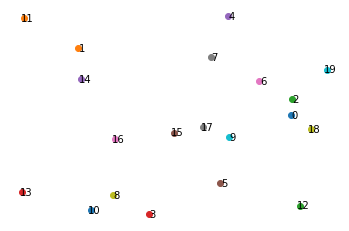

In [63]:
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
plt.gca().axis('off');

In [64]:
df1 = pd.DataFrame()
df1 = df
df1 = df1.drop(['Left'],axis=1)
df1 = df1.drop(['Right'],axis=1)
df1 = df1.drop(['coordinate'],axis=1)
df1 = df1.drop(['ID'],axis=1)

In [65]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.00,72.99,8.11,66.10,53.44,40.62,19.79,38.09,67.67,21.94,77.47,94.87,45.82,90.42,66.21,36.75,54.93,27.27,9.43,25.40
1,72.99,0.00,69.96,86.29,48.42,80.78,57.55,40.60,75.01,64.31,81.73,22.49,104.22,74.36,15.62,51.53,47.25,54.96,81.80,76.48
2,8.11,69.96,0.00,72.63,46.12,47.86,13.55,32.57,73.09,27.28,83.00,91.28,53.89,94.49,64.82,39.83,57.62,30.40,16.32,18.21
3,66.10,86.29,72.63,0.00,102.70,26.78,75.22,81.40,14.28,45.74,17.62,105.87,46.25,39.97,70.99,41.76,39.05,47.08,65.36,90.84
4,53.44,48.42,46.12,102.70,0.00,84.43,33.96,21.30,97.02,61.21,106.37,62.15,98.10,108.48,54.74,61.04,71.02,56.30,62.40,40.43
5,40.62,80.78,47.86,26.78,84.43,0.00,53.16,63.83,33.27,23.34,41.65,102.68,26.64,60.42,67.47,29.33,39.10,29.07,38.81,65.92
6,19.79,57.55,13.55,75.22,33.96,53.16,0.00,19.03,73.06,30.07,83.00,78.36,64.24,91.34,54.11,36.96,52.98,28.80,29.08,21.29
7,38.09,40.60,32.57,81.40,21.30,63.83,19.03,0.00,75.91,40.95,85.39,60.19,79.75,88.91,40.85,39.75,50.71,35.23,47.52,35.92
8,67.67,75.01,73.09,14.28,97.02,33.27,73.06,75.91,0.00,45.89,9.97,93.53,57.11,27.62,59.45,36.71,28.37,44.28,68.91,90.94
9,21.94,64.31,27.28,45.74,61.21,23.34,30.07,40.95,45.89,0.00,55.77,86.79,40.61,68.61,53.66,17.04,34.76,9.51,25.26,45.36


In [67]:
distance = df1

In [68]:
type(df.ID[0])

numpy.int64

In [69]:

# get distance in a dictionary form
distances = dict( ((l1,l2), distance.iloc[l1, l2] ) for l1 in locations for l2 in locations if l1!=l2)
distances

{(0, 1): 72.99,
 (0, 2): 8.11,
 (0, 3): 66.1,
 (0, 4): 53.44,
 (0, 5): 40.62,
 (0, 6): 19.79,
 (0, 7): 38.09,
 (0, 8): 67.67,
 (0, 9): 21.94,
 (0, 10): 77.47,
 (0, 11): 94.87,
 (0, 12): 45.82,
 (0, 13): 90.42,
 (0, 14): 66.21,
 (0, 15): 36.75,
 (0, 16): 54.93,
 (0, 17): 27.27,
 (0, 18): 9.43,
 (0, 19): 25.4,
 (1, 0): 72.99,
 (1, 2): 69.96,
 (1, 3): 86.29,
 (1, 4): 48.42,
 (1, 5): 80.78,
 (1, 6): 57.55,
 (1, 7): 40.6,
 (1, 8): 75.01,
 (1, 9): 64.31,
 (1, 10): 81.73,
 (1, 11): 22.49,
 (1, 12): 104.22,
 (1, 13): 74.36,
 (1, 14): 15.62,
 (1, 15): 51.53,
 (1, 16): 47.25,
 (1, 17): 54.96,
 (1, 18): 81.8,
 (1, 19): 76.48,
 (2, 0): 8.11,
 (2, 1): 69.96,
 (2, 3): 72.63,
 (2, 4): 46.12,
 (2, 5): 47.86,
 (2, 6): 13.55,
 (2, 7): 32.57,
 (2, 8): 73.09,
 (2, 9): 27.28,
 (2, 10): 83.0,
 (2, 11): 91.28,
 (2, 12): 53.89,
 (2, 13): 94.49,
 (2, 14): 64.82,
 (2, 15): 39.83,
 (2, 16): 57.62,
 (2, 17): 30.4,
 (2, 18): 16.32,
 (2, 19): 18.21,
 (3, 0): 66.1,
 (3, 1): 86.29,
 (3, 2): 72.63,
 (3, 4): 102.7,
 (3

In [79]:
V = 4 #the number vehicles/people deployed

In [80]:
#problem
prob=LpProblem("vehicle", LpMinimize)

In [81]:
#indicates if location i is connected to location j along route 
indicator = LpVariable.dicts('indicator',distances, 0,1,LpBinary)
#elimiate subtours
eliminator = LpVariable.dicts('eliminator', df.ID, 0, len(df.ID)-1, LpInteger)

In [82]:
type(indicator)

dict

In [83]:
type(distances)

dict

In [84]:
cost = lpSum([indicator[(i,j)]*distances[(i,j)] for (i,j) in distances])
prob+=cost

In [85]:
#constraints
for v in df.ID:
    cap = 1 if v != 15 else V
    #inward possible route
    prob+= lpSum([ indicator[(i,v)] for i in df.ID if (i,v) in indicator]) ==cap
    #outward possible route
    prob+=lpSum([ indicator[(v,i)] for i in df.ID if (v,i) in indicator]) ==cap
    
#subtour elimination
num=len(df.ID)/V
for i in df.ID:
    for j in df.ID:
        if i != j and (i != 15 and j!= 15) and (i,j) in indicator:
            prob += eliminator[i] - eliminator[j] <= (num)*(1-indicator[(i,j)]) - 1

In [86]:
%time prob.solve()
print(LpStatus[prob.status])

Wall time: 9min 43s
Optimal


In [92]:
feasible_edges = [ e for e in indicator if value(indicator[e]) != 0 ]

def get_next_loc(initial):
    '''to get the next edge'''
    edges = [e for e in feasible_edges if e[0]==initial]
    for e in edges:
        feasible_edges.remove(e)
    return edges

In [93]:
routes = get_next_loc(15)
routes = [ [e] for e in routes ]

for r in routes:
    while r[-1][1] !=15:
        r.append(get_next_loc(r[-1][1])[-1])

In [94]:
routes

[[(15, 3), (3, 8), (8, 10), (10, 13), (13, 16), (16, 15)],
 [(15, 6), (6, 19), (19, 2), (2, 0), (0, 18), (18, 15)],
 [(15, 7), (7, 4), (4, 11), (11, 1), (1, 14), (14, 15)],
 [(15, 17), (17, 9), (9, 12), (12, 5), (5, 15)]]

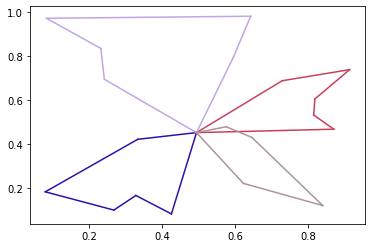

In [95]:
#outline the routes
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)

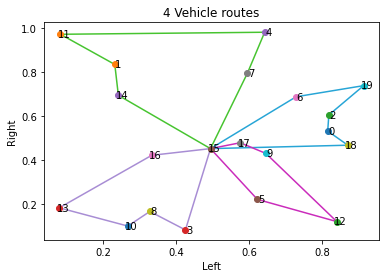

In [96]:
#outline the routes
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
    
plt.title('%d '%V + 'Vehicle routes' if V > 1 else 'Vehicle route')
plt.xlabel('Left')
plt.ylabel('Right')
plt.show()

In [97]:
routes

[[(15, 3), (3, 8), (8, 10), (10, 13), (13, 16), (16, 15)],
 [(15, 6), (6, 19), (19, 2), (2, 0), (0, 18), (18, 15)],
 [(15, 7), (7, 4), (4, 11), (11, 1), (1, 14), (14, 15)],
 [(15, 17), (17, 9), (9, 12), (12, 5), (5, 15)]]